**GRIP @ The Sparks Foundation**

**TASK 5: EXPLORATORY DATA ANALYSIS - SPORTS**

Author: **Syed Shayan Shahid**

Batch: **GRIP NOVEMBER 2023**

Domain: **Data Science**

**Aim:** To perform 'exploratory data analysis' to find out the most successful teams, players and factors contributing win or loss of a team.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'C:\Users\PC\Desktop\TSF-INTERN\Indian Premier League\matches.csv'
matches_df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print(matches_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
# Display the first few rows of the dataset
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# Summary statistics of numerical columns
matches_df.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
# Check for missing values
print(matches_df.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [7]:
#Filling the missing values city, winner, player_of_match, umpire1, umpire2
matches_df['city'].fillna('Dubai', inplace=True)
matches_df['winner'].fillna('Draw', inplace=True)
matches_df['player_of_match'].fillna('No Player', inplace=True)
matches_df['umpire1'].fillna('No Umpire', inplace=True)
matches_df['umpire2'].fillna('No Umpire', inplace=True)

In [8]:
matches_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            637
dtype: int64

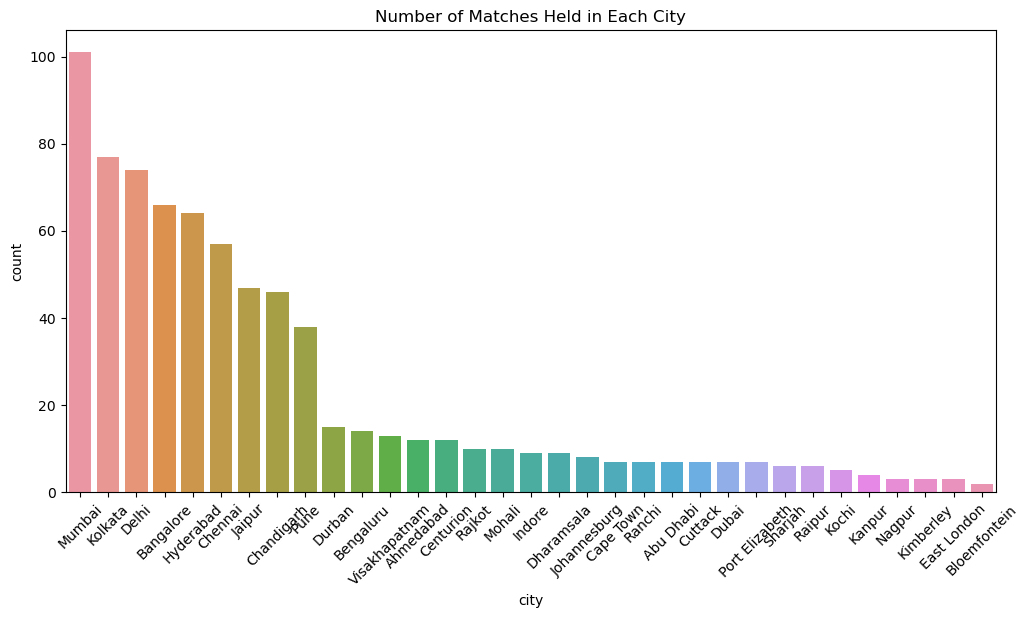

In [9]:
# Number of Matches that were held in each city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=matches_df, order=matches_df['city'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Matches Held in Each City')
plt.show()

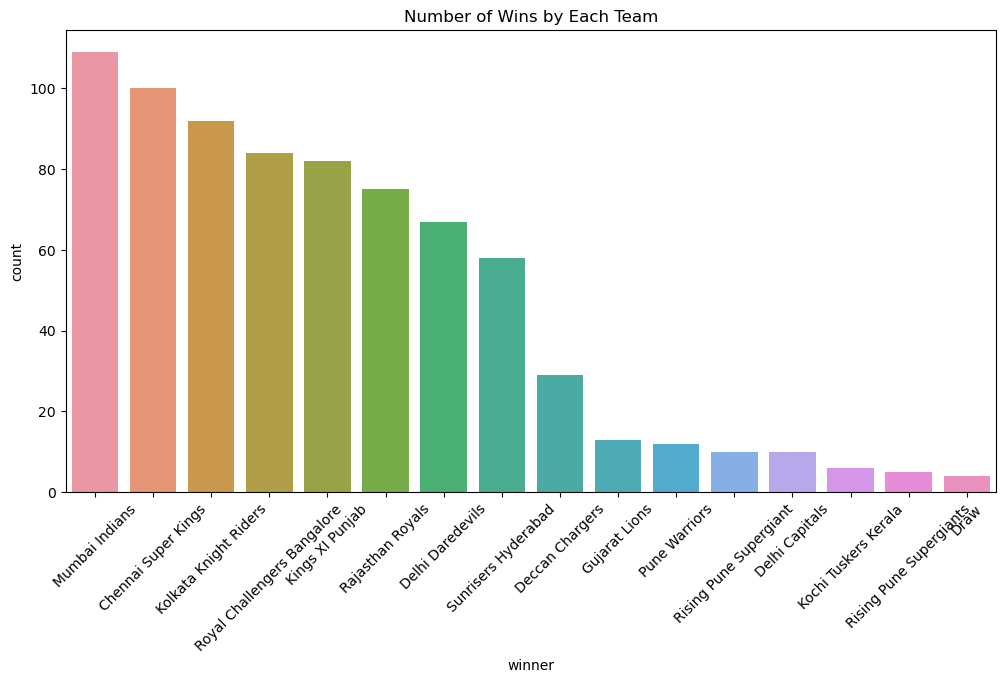

In [10]:
# Visualize the number of wins by each team
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=matches_df, order=matches_df['winner'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Wins by Each Team')
plt.show()

The most successful team is: Mumbai Indians
The most successful player is: CH Gayle


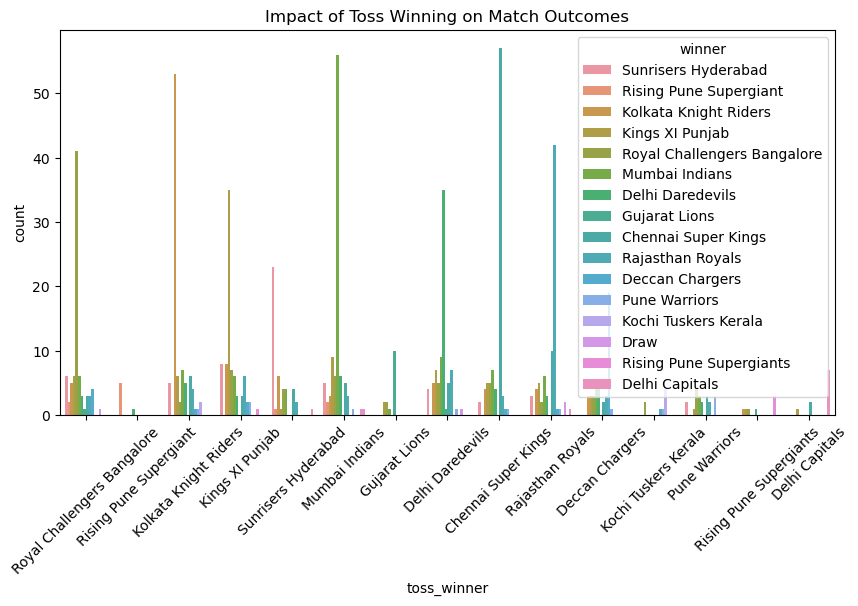

In [11]:
# Identify the most successful teams
most_successful_teams = matches_df['winner'].value_counts().idxmax()
print(f"The most successful team is: {most_successful_teams}")

# Identify the most successful players
most_successful_players = matches_df['player_of_match'].value_counts().idxmax()
print(f"The most successful player is: {most_successful_players}")

# Factors contributing to wins or losses
# Visualize the impact of toss winning on match outcomes
plt.figure(figsize=(10, 5))
sns.countplot(x='toss_winner', hue='winner', data=matches_df)
plt.xticks(rotation=45)
plt.title('Impact of Toss Winning on Match Outcomes')
plt.show()

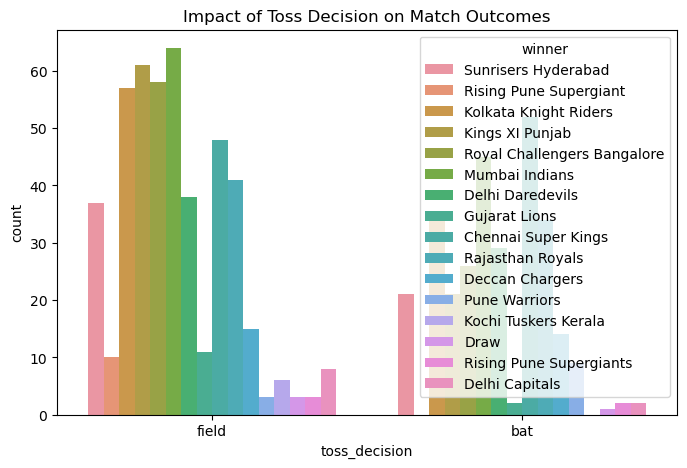

In [12]:
# Visualize the impact of toss decision on match outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='toss_decision', hue='winner', data=matches_df)
plt.title('Impact of Toss Decision on Match Outcomes')
plt.show()

In [13]:
#Top 5 teams with the most high win_by_runs
matches_df.sort_values(by='win_by_runs', ascending=False).head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN


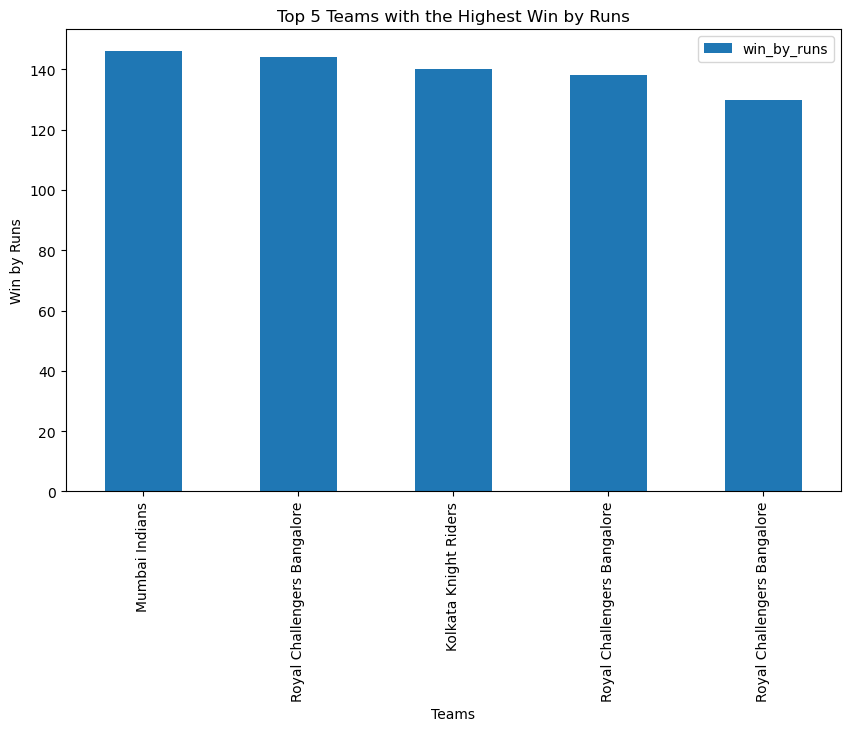

In [14]:
# Visualize Top 5 teams with the most high win_by_runs
top_5_teams = matches_df.sort_values(by='win_by_runs', ascending=False).head(5)
top_5_teams.plot(x='winner', y='win_by_runs', kind='bar', figsize=(10, 6))
plt.xlabel('Teams')
plt.ylabel('Win by Runs')
plt.title('Top 5 Teams with the Highest Win by Runs')
plt.show()

In [15]:
#Top 10 teams with the most losses by runs scored
matches_df.sort_values(by='win_by_runs', ascending=True).head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
278,279,2011,Hyderabad,2011-05-05,Deccan Chargers,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,4,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AM Saheba,NaN
662,7920,2018,Pune,28/04/18,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RG Sharma,Maharashtra Cricket Association Stadium,Chris Gaffaney,Nitin Menon,Anil Dandekar
285,286,2011,Hyderabad,2011-05-10,Deccan Chargers,Pune Warriors,Deccan Chargers,bat,normal,0,Pune Warriors,0,6,MR Marsh,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AM Saheba,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
283,284,2011,Chandigarh,2011-05-08,Kings XI Punjab,Pune Warriors,Kings XI Punjab,bat,normal,0,Pune Warriors,0,5,R Sharma,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN
282,283,2011,Bangalore,2011-05-08,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare,NaN
664,7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
558,559,2015,Chennai,2015-05-08,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,HH Pandya,"MA Chidambaram Stadium, Chepauk",CB Gaffaney,CK Nandan,NaN


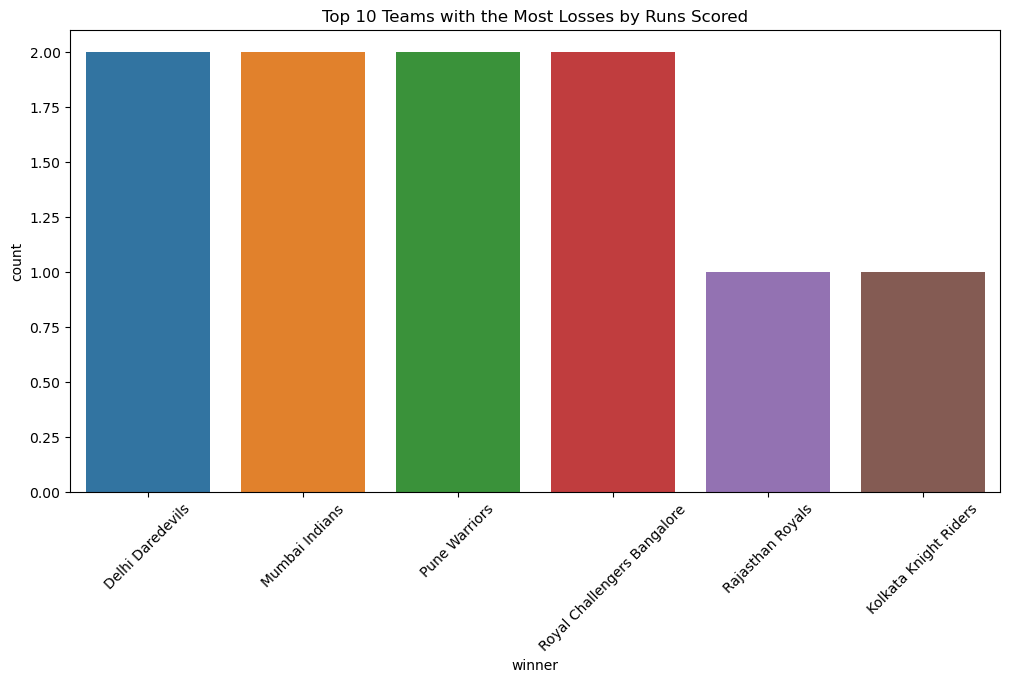

In [16]:
#Top 10 teams with the most losses by runs scored

top_10_teams = matches_df.sort_values(by='win_by_runs', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=top_10_teams, order=top_10_teams['winner'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Top 10 Teams with the Most Losses by Runs Scored')
plt.show()

In [17]:
#Top 3 teams with the highest average score per match
matches_df.groupby('winner')['win_by_runs'].mean().sort_values(ascending=False).head(3)


winner
Chennai Super Kings            17.780000
Mumbai Indians                 17.119266
Royal Challengers Bangalore    14.904762
Name: win_by_runs, dtype: float64

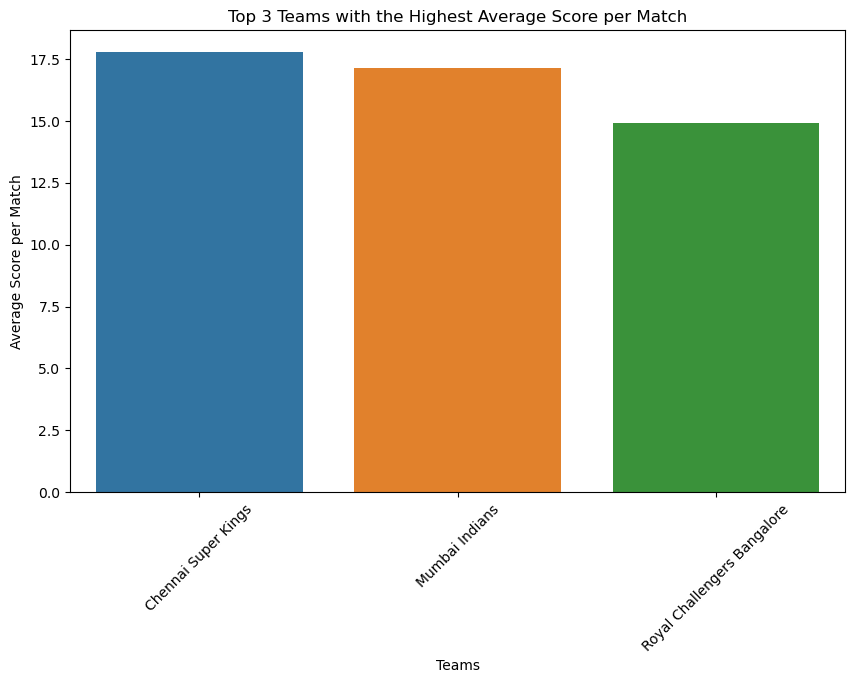

In [18]:
# Calculate the top 3 teams with the highest average score per match
top_3_teams = matches_df.groupby('winner')['win_by_runs'].mean().sort_values(ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_teams.index, y=top_3_teams.values)
plt.xlabel('Teams')
plt.ylabel('Average Score per Match')
plt.title('Top 3 Teams with the Highest Average Score per Match')
plt.xticks(rotation=45)
plt.show()


In [19]:
#Top 3 teams with the lowest average score per match
matches_df.groupby('winner')['win_by_runs'].mean().sort_values(ascending=True).head(3)

winner
Draw                    0.000000
Gujarat Lions           0.076923
Kochi Tuskers Kerala    3.833333
Name: win_by_runs, dtype: float64

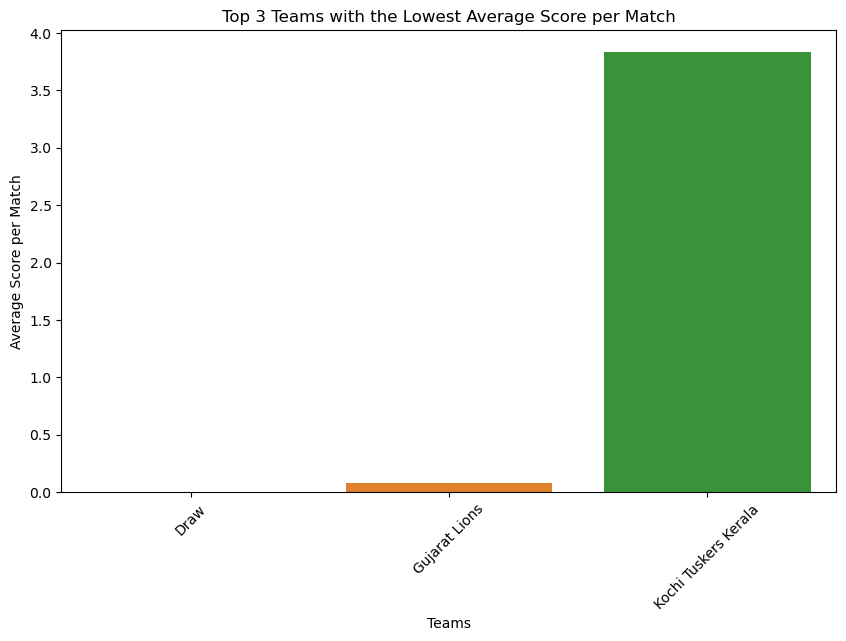

In [20]:
# Visualizing top 3 teams with the lowest average score per match
top_3_teams_lowest_avg = matches_df.groupby('winner')['win_by_runs'].mean().sort_values().head(3)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_teams_lowest_avg.index, y=top_3_teams_lowest_avg.values)
plt.xlabel('Teams')
plt.ylabel('Average Score per Match')
plt.title('Top 3 Teams with the Lowest Average Score per Match')
plt.xticks(rotation=45)
plt.show()